# Investigate the polarity issue of the hydrophone data

In [54]:
# Imports
from matplotlib.pyplot import subplots
from pandas import Timedelta, Timestamp

from utils_basic import ROOTDIR_HYDRO as outdir
from utils_basic import get_timeax_from_trace
from utils_preproc import read_and_process_windowed_hydro_waveforms
from utils_plot import save_figure

In [55]:
# Inputs
station = "B00"
dur = 0.4
location = "05"
starttime = Timestamp("2019-05-18T14:36:16.3Z")

freqmin = 40.0

In [56]:
# Read and process the data
stream_no_filt = read_and_process_windowed_hydro_waveforms(starttime, dur, stations=station, locations=location)
stream_causal = read_and_process_windowed_hydro_waveforms(starttime, dur, stations=station, locations=location, freqmin=40.0)
stream_acausal = read_and_process_windowed_hydro_waveforms(starttime, dur, stations=station, locations=location, freqmin=40.0, zerophase=True)

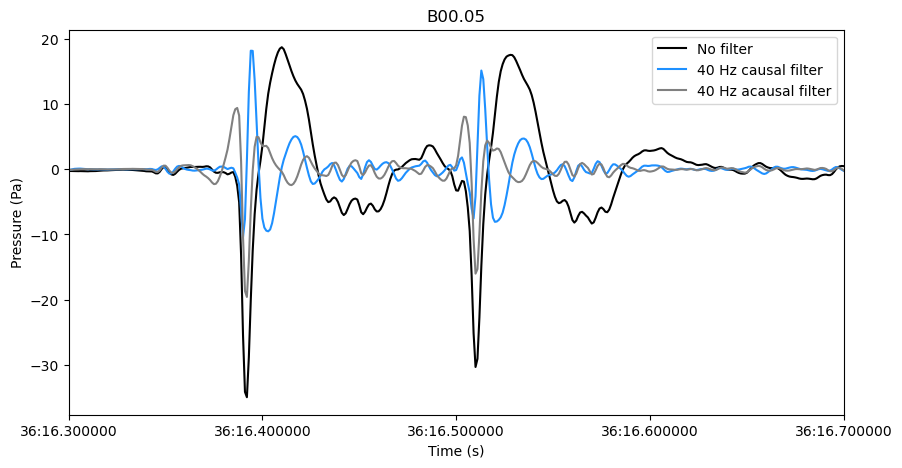

In [57]:
# Plot the data
fig, ax = subplots(1, 1, figsize=(10, 5))

trace_no_filt = stream_no_filt[0]
data_no_filt = trace_no_filt.data
timeax = get_timeax_from_trace(trace_no_filt)

trace_causal = stream_causal[0]
data_causal = trace_causal.data

trace_acausal = stream_acausal[0]
data_acausal = trace_acausal.data

ax.plot(timeax, data_no_filt, color="black", label="No filter")
ax.plot(timeax, data_causal, color="dodgerblue", label="40 Hz causal filter")
ax.plot(timeax, data_acausal, color="gray", label="40 Hz acausal filter")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Pressure (Pa)")

ax.set_xlim(starttime, starttime + Timedelta(seconds=dur))
ax.set_title(f"{station}.{location}")
ax.legend()

In [58]:
# Save the figure
figname = f"bubble_signal_example_{station}.{location}.png"
save_figure(fig, figname, outdir=outdir)

Figure saved to /Volumes/OmanData/data/hydrophones/bubble_signal_example_B00.05.png
